# Assignment
*  In this assignment, we will build a classifier for MNIST from scratch using just [NumPy](https://numpy.org/)

*  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits of size 28x28

*  The dataset that you are expected to use for training is already uploaded along

*   Our model will have 1 hidden layer, like the one below (not our recommendation to use 256 in the hidden layer though, try various values out)

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

<center>
<img src="https://user-images.githubusercontent.com/81357954/166119893-4ca347b8-b1a4-40b8-9e0a-2e92b5f164ae.png">
</center>

## Import libraries here
NumPy, Matplotlib, ...

Also remember to initialize the seed for reproducibility of results

In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
import random

## Load *Dataset*
Load data from the given pickle file

In [2]:

data_file="MNIST_data.pkl"
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']
y = train_dataset['y']

# normalize
X=X.transpose()
for i in range(0,784,1):
    l=X[i]
    if(np.var(l)==0):
        X[i]=np.zeros(60000)
        continue
    l=(l-np.mean(l))/(math.sqrt(np.var(l))+0.00001)
    X[i]=l
X=X.transpose()
print(X.shape)
print(y.shape)
# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.5)                                           



(60000, 784)
(60000, 1)


In [3]:
i=0
for i in range(0,40):print(y[i])

[6]
[9]
[8]
[1]
[0]
[5]
[7]
[0]
[4]
[2]
[5]
[0]
[5]
[7]
[4]
[8]
[9]
[9]
[5]
[0]
[3]
[8]
[3]
[7]
[7]
[9]
[3]
[4]
[0]
[6]
[7]
[9]
[1]
[4]
[2]
[6]
[7]
[3]
[5]
[2]


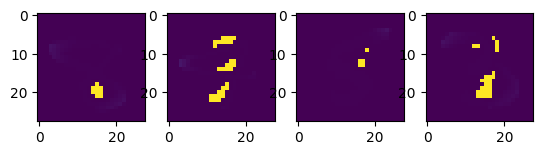

          17754          21306            11155            7440


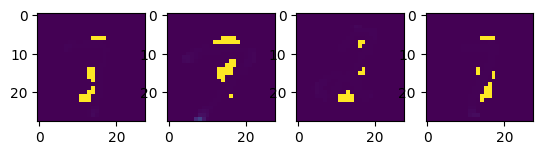

          13007          4753            7777            858


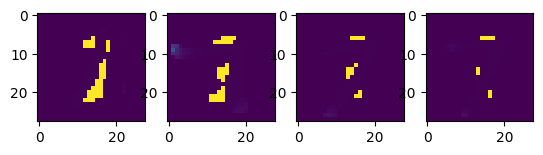

          22187          27708            997            17168


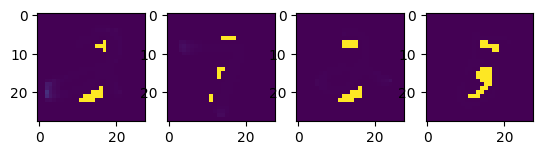

          4444          12693            5081            9668


In [4]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
a=np.arange(0,16)
for i in range(0,16):
    if(i%4==0):f, axis = plt.subplots(1, 4)
    a[i]=random.randint(0,30000)
    b=X_train[a[i]]
    axis[i%4].imshow(b.reshape(28,28))
    if(i%4==3):
        plt.show()
        print("         ",a[i-3],"        ",a[i-2],"          ",a[i-1],"          ",a[i])
    

## Building up parts of our classifier

**Activation functions**

In [5]:
def relu(z):
    """
    Arguments:
    z -- A scalar or numpy array.
    Return:
    relu func applied to each element of z
    """
    p,q=z.shape
    for i in range(p-1):
        for j in range(q-1):
            z[i][j]=max(0,z[i][j])
    return z

def softmax(z):
    """
    returns computed probabilitites for each element in batch separately
    input: (N, 10)
    output: (N, 10)
    """
    reduced=z-np.max(z,axis=1,keepdims=True)
    exped=np.exp(reduced)
    den=np.sum(exped,axis=1,keepdims=True)
    
    return exped/den



**Notes about the Neural Network** 
*   Input size is (784,) because 28x28 = 784
*   Output size will be 10, each element represeting probability of the image representing that digit
*   Size of the hidden layer is a hyperparameter



**Initialize the layers weights**

Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero. But you can try everything out :)

In [12]:
def init_params(layer_1, hidden_layer, layer_2):
    """
    ideally it should take the size of all the layers and 
    should return the initialized weights.
    """
    N=30000
    w1=0.0001*np.random.randint(1000, size=(layer_1,hidden_layer))
    w2=0.0001*np.random.randint(1000, size=(hidden_layer,layer_2))
    #for i in (0,784,1):
    #    for j in (0,256,1):
    #        w1[i,j]=0.001*random.randint(0,1000)
    #for i in (hidden_layer):
    #    for j in (layer_2):
    #        w2[i][j]=0.001*random.randint(0,1000)
    b1=np.zeros((256,1))
    b2=np.zeros((10,1))
    w1,b1,w2,b2
    return w1,b1,w2,b2
    #y_hat=np.matmul(w,x)+b

**Forward Propagation**

In [13]:
def forward_propg(X, w1, w2, b1, b2):
    """
    X: input data
    returns: logits, output of each layer z1,z2,a1,a2
    """
    #here X will be X train and its dimensions are N*784, dimensions of w1 are 784*256, dimensions of b1 are N*1
    #then dimensions of z1 are N*256 and z2 are N*10. w2 will have 256*10 and z1*w2 will have N*10. 
    z1=np.matmul(X,w1)
    z1=z1.transpose()
    for i in range (0,256,1):
        z1[i]=z1[i]+b1[i]
    z1=z1.transpose()
    a1=relu(z1)
    z2=np.matmul(a1,w2)
    z2=z2.transpose()
    for i in range (0,10,1):
        z2[i]=z2[i]+b2[i]
    z2=z2.transpose()

    #print(z2)
    a2=softmax(z2)
    #print(a2)
    return z1, z2, a1, a2
    

**Backward Propagation**


You may use stochastic gradient descent or batch gradient descent here. Feel free to use any loss function.

In [14]:
def backward_propg(w1, b1, w2, b2, X, y, z1, z2, a1, a2,lr ):#"""output of forward propg"""
    """
    should update the weights and return updated weights
    """
    N=30000
    l=np.zeros((30000,))
    for i in range(30000):
        l[i]=-math.log(a2[i][y[i]]+1e-4)
    L=np.mean(l)
    del_L_z2=np.divide(a2,N)
    for i in range(0,30000,1):
        del_L_z2[i][y[i]]-=1/N
    del_L_w2=np.matmul(a1.transpose(),del_L_z2)
    del_L_a1=np.matmul(del_L_z2,w2.transpose())
    
    
    #dimensions of z2 are N,10 and that of b2 are N,1
    #print(del_L_z2.shape)
    del_L_b2=np.zeros((10,1))
    
    del_L_z2=del_L_z2.transpose()
    for i in range (0,10,1):
        t=del_L_z2[i]
        del_L_b2=np.sum(t)
    del_L_z2=del_L_z2.transpose()
    #a1=relu(z1)
    #del by z1=del by a1 (where a1[i][j]>0)
    
    m,n=a1.shape
    del_L_z1=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            if(a1[i][j]>0):del_L_z1[i][j]=del_L_a1[i][j]
    
    
    del_L_b1=np.zeros((256,1))
    del_L_z1=del_L_z1.transpose()
    for i in range (0,256,1):
        t=del_L_z1[i]
        del_L_b1=np.sum(t)
    del_L_z1=del_L_z1.transpose()
        
    del_L_w1=np.matmul(X.transpose(),del_L_z1)
    #print(del_L_w1.shape)
    #doubt in del_by_b1 and del_by_b2
    
    #updates
    w1=w1 - lr*del_L_w1
    w2=w2 - lr*del_L_w2
    #print(b1.shape)
    #print(del_L_b1.shape)
    b1=b1 - lr*(del_L_b1)
    b2=b2 - lr*(del_L_b2)
    return w1,b1,w2,b2,L

In [15]:
def cost_func(weight,y,params):
    """
    calculate loss to check whether it is decreasing at each epoch or not
    one can return this in backward propagation as well
    """
    
    pass


## Integrate everything

In [16]:
def train(X, y, hidden_nodes, epochs=1000, lr=1e-5):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    layer_1=784
    hidden_layer=256
    layer_2=10
    # initialize weights.
    
    w1,b1,w2,b2=init_params(layer_1,hidden_layer,layer_2)
    
    for i in range(epochs):
        #print(w1)
        # forward propagation
        z1,z2,a1,a2=forward_propg(X, w1, w2, b1, b2)
        
        # print cost at every 100 or so iterations
        
        # backward propagation
        w1,b1,w2,b2,L=backward_propg(w1, b1, w2, b2, X, y, z1, z2, a1, a2,lr )
        print(i,"  ",L)
    return w1,b1,w2,b2,L

In [ ]:
fw1,fb1,fw2,fb2,fL=train(X_train,y_train,256,1000,1e-5)

0    8.184210960364908
1    7.929050691901483
2    8.165780337529894
3    8.143876517818162
4    8.176835648802793
5    7.661818692461946
6    7.5398818250858675
7    7.560213843301469
8    7.4366340673892966
9    7.2081817277277604
10    7.478072829012901
11    7.598814157208428
12    7.569414965355669
13    6.783114062003761
14    7.013193243864374
15    7.606540982234792
16    7.395094705808116
17    6.6754301132852785
18    7.414595836459983
19    7.494920514937616
20    6.747437041937537
21    6.842176605872788
22    7.156630427347073
23    7.1265103962125975
24    6.773673484701577
25    7.045943070950193
26    6.756798598438519
27    6.967775461090776
28    6.85985826406169
29    7.01145019118327
30    6.935467546479453
31    6.757557636782471
32    6.9292442029627015
33    6.443892361561022
34    6.472622902665685
35    6.885726727254183
36    6.730826082115064
37    7.008013391441528
38    6.778758740605528
39    6.744747571572085
40    6.597294978531659
41    6.83358563126499

In [48]:
def predict(X, w1,b1,w2,b2):
    """
    returns the prediction in [0,9] for each element in X
    """
    z1=np.matmul(X,w1)
    z1=z1.transpose()
    for i in range (0,256,1):
        z1[i]=z1[i]+b1[i]
    z1=z1.transpose()
    a1=relu(z1)
    z2=np.matmul(a1,w2)
    z2=z2.transpose()
    for i in range (0,10,1):
        z2[i]=z2[i]+b2[i]
    z2=z2.transpose()
    #print(z2)
    a2=softmax(z2)
    y_predict=np.zeros((30000,1))
    for i in range(0,30000,1):
        j=a2.argmax()
        y_predict[i][0]=j
    return y_predict

In [49]:
def accuracy(y_predict, y):
    """
    prints % accuracy
    """
    t=0
    for i in range(0,30000):
        if(y_predict[i]==y[i]):t+=1
    return t/300    

In [50]:
y_predict=predict(X_test,w1,b1,w2,b2)

In [52]:
acc=accuracy(y_predict,y_test)
print(acc)

### Save as pickle

In [ ]:
import pickle
import random

roll_num = "22b0396" # enter ldap
hidden_dim = # replace with your own hidden dimension

model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': pass, # layer 0 weight (784, z)
    'layer_0_bias': pass, # layer 0 bias (z, 1)
    'layer_1_wt': pass, # layer 1 weight (z, 10)
    'layer_1_bias': pass # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)